# pickle - persist arbitrary collections of in memory Python data structures to a file
- pickle uses 'binary' streams
- very handy for "small to medium" data structures
- probably not the best approach for huge data structures
- easy to use
- no way to query or modify
- note ```__eq__``` method
- [doc](https://docs.python.org/3/library/pickle.html) 

In [1]:
class SVGBase:
    "this class is not intended to be instantiated"

    def __repr__(self):
        return self.svg()

# each class should have a 'draw' method
# that knows how to render a graphical object


In [2]:
class Circle(SVGBase):
    def __init__(self, cx, cy, r):
        self.cx = cx
        self.cy = cy
        self.r = r
        
    def __eq__(self, right):
        return isinstance(right, Circle) \
            and self.cx == right.cx and self.cy == right.cy and self.r == right.r

    def svg(self):
        c = f'<circle  cx="{self.cx}" cy="{self.cy}" r="{self.r}" ' 
        s ='style="fill:Wheat; stroke:SteelBlue; stroke-width:5;"/>'
        return c + s

In [3]:
class Rect(SVGBase):
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
        
    def __eq__(self, right):
        return isinstance(right, Rect) \
                and self.x == right.x and self.y == right.y \
                and self.width == self.width and self.height == right.height
        
    def svg(self):
        r = f'<rect x="{self.x}" y="{self.y}" width="{self.width}" height="{self.height}" '
        s = ' style="stroke:Navy; stroke-width:4; fill:LightSkyBlue;"/>'
        return r + s

In [4]:
class Line(SVGBase):
    def __init__(self, x1, y1, x2, y2):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
    
    def __eq__(self, right):
        return isinstance(right, Line) \
            and self.x1 == right.x1 and self.y1 == right.y1 \
            and self.x2 == right.x2  and self.y2 == right.y2
       
    def svg(self):
        l = f'<line x1="{self.x1}" y1="{self.y1}" x2="{self.x2}" y2="{self.y2}" '
        s = ' style="stroke:SlateBlue; stroke-width:4"/>'
        return l + s
        

In [5]:
import pickle

class Diagram:
    def __init__(self, objs):
        self.objs = objs
    
    def __eq__(self, right):
        return isinstance(right, Diagram) \
                and self.objs == right.objs
    
    def svg(self):
        s = '''<svg width="400" height="400">'''
        for obj in self.objs:
            s += obj.svg()
        s += '</svg>'
        return s
    
    def _repr_svg_(self):
        '''the presence of this method tells
        notebook to render SVG!!'''
        return self.svg()
    
    def dump(self, path):
        # save the Editor and everything it reaches
        # 'bw' - 'binary write'
        with open(path, 'bw') as fd:
            pickle.dump(self, fd)
            
    def load(path):
        "class method"
        # 'br' - binary read
        with open(path, 'br') as f:
            return pickle.load(f)

In [6]:
Circle(200, 200,44)

<circle  cx="200" cy="200" r="44" style="fill:Wheat; stroke:SteelBlue; stroke-width:5;"/>

In [7]:
c=Circle(200, 200,44)
c2 = Circle(130,120, 60)
r = Rect(250, 100, 40,80)
l = Line(0,0, 400,400)

objs = [c,c2, r, l]
d = Diagram(objs)
d.svg()


'<svg width="400" height="400"><circle  cx="200" cy="200" r="44" style="fill:Wheat; stroke:SteelBlue; stroke-width:5;"/><circle  cx="130" cy="120" r="60" style="fill:Wheat; stroke:SteelBlue; stroke-width:5;"/><rect x="250" y="100" width="40" height="80"  style="stroke:Navy; stroke-width:4; fill:LightSkyBlue;"/><line x1="0" y1="0" x2="400" y2="400"  style="stroke:SlateBlue; stroke-width:4"/></svg>'

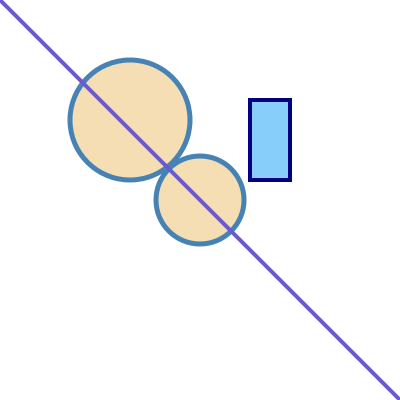

In [8]:
d

In [9]:
import tempfile
from pathlib import Path

# does not create the file, just makes a pathname
path = Path(tempfile.NamedTemporaryFile().name)

d.dump(path)

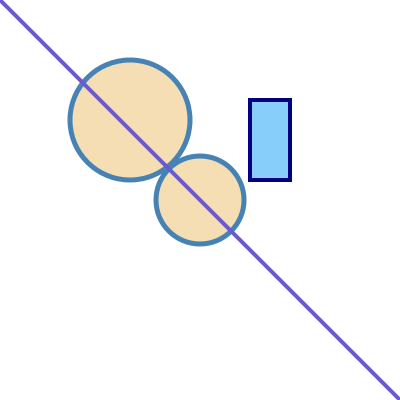

In [10]:
# read dumped file, and 
# reconstruct the saved data structures

# if your pickle dump includes custom classes 
# or functions, they must be defined 
# before you do a pickle load.
# 'br' - binary read

dd = Diagram.load(path)
dd

In [11]:
d is dd

False

In [12]:
d == dd

True